# Step 1: Deciding (not) to Segment

### Problem Statment : Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


# Step 2:Specifying the Ideal Target Segment
Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

# Step 3: Collecting Data and Step 4: Exploring Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import seaborn as sns
plt.style.use('fivethirtyeight')

In [6]:
retail_data = pd.read_csv('Downloads/OnlineRetaildata.csv')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9999 non-null   object 
 1   StockCode    9999 non-null   object 
 2   Description  9957 non-null   object 
 3   Quantity     9999 non-null   int64  
 4   InvoiceDate  9999 non-null   object 
 5   UnitPrice    9999 non-null   float64
 6   CustomerID   7708 non-null   float64
 7   Country      9999 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [8]:
num_unique_vals = []
cols = []
for col in retail_data.columns:
  print(col)
  cols.append(col)
  print(f"Number of Rows: {retail_data.shape[0]}")
  print(f"First 5 unique Values in {col}: {retail_data[col].unique()[:5]}")
  print(f"Number of Unique Values in {col}: {retail_data[col].nunique()}")
  num_unique_vals.append(retail_data[col].nunique())
  print(f"Top 5 Value counts of {col}: \n{retail_data[col].value_counts().head()}")
  print()
  print("*" * 100)
  print('\n')

InvoiceNo
Number of Rows: 9999
First 5 unique Values in InvoiceNo: ['536365' '536366' '536367' '536368' '536369']
Number of Unique Values in InvoiceNo: 512
Top 5 Value counts of InvoiceNo: 
536876    593
536592    592
536544    527
536982    145
536865    140
Name: InvoiceNo, dtype: int64

****************************************************************************************************


StockCode
Number of Rows: 9999
First 5 unique Values in StockCode: ['85123A' '71053' '84406B' '84029G' '84029E']
Number of Unique Values in StockCode: 2015
Top 5 Value counts of StockCode: 
22632     63
22633     59
22866     57
22865     57
85123A    55
Name: StockCode, dtype: int64

****************************************************************************************************


Description
Number of Rows: 9999
First 5 unique Values in Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY H

In [9]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9999 non-null   object 
 1   StockCode    9999 non-null   object 
 2   Description  9957 non-null   object 
 3   Quantity     9999 non-null   int64  
 4   InvoiceDate  9999 non-null   object 
 5   UnitPrice    9999 non-null   float64
 6   CustomerID   7708 non-null   float64
 7   Country      9999 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [10]:
retail_data.describe().style.background_gradient('RdBu')

,Quantity,UnitPrice,CustomerID
count,9999.000000,9999.000000,7708.000000
mean,7.829183,3.837371,15615.779320
std,104.327618,14.310863,1756.434574
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,2.000000,2.510000,15605.000000
75%,8.000000,4.210000,17228.000000
max,2880.000000,887.520000,18239.000000


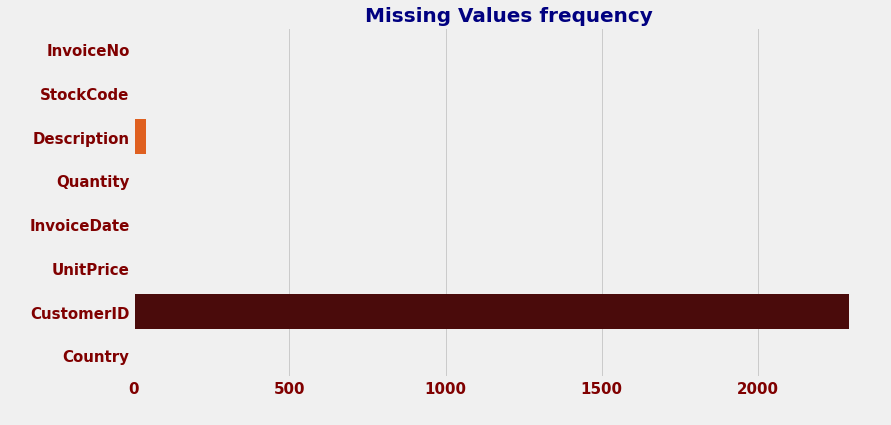

In [11]:
missing_retail_data = retail_data.isnull().sum().to_frame().reset_index().rename({0: 'missing_val_%'}, axis = 1)
plt.figure(figsize = (12,6))
sns.barplot(data = missing_retail_data, x = 'missing_val_%', y = 'index',palette='gist_heat_r', alpha = 1)
plt.title('Missing Values frequency', fontsize = 20, fontweight = 'bold', color = 'navy')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks( fontsize = 15, fontweight = 'bold', color = 'maroon')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'maroon')
plt.show();

In [12]:
retail_data.isnull().sum().to_frame().rename({0: 'missing_val_freq'}, axis = 1).style.background_gradient('YlOrBr')

,missing_val_freq
InvoiceNo,0
StockCode,0
Description,42
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,2291
Country,0


In [13]:
(retail_data['CustomerID'].mode()[0])

17850.0

In [14]:
retail_data['Description'].replace(np.nan, 'Description Missing', inplace =True)

In [15]:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['CustomerID'] = retail_data['CustomerID'].replace(np.nan, 0).astype(int).astype(str).replace('0', '-99')
retail_data['InvoiceMonth'] = pd.to_datetime(retail_data['InvoiceDate']).dt.month
# retail_data['InvoiceYear'] = pd.to_datetime(retail_data['InvoiceDate']).dt.year
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1


In [16]:
retail_data.describe(include = 'all', datetime_is_numeric=True).fillna(0).style.background_gradient('RdBu')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
count,9999,9999,9999,9999.000000,9999,9999.000000,9999,9999,9999.000000
unique,512,2015,1982,0.000000,0,0.000000,324,15,0.000000
top,536876,22632,HAND WARMER UNION JACK,0.000000,0,0.000000,-99,United Kingdom,0.000000
freq,593,63,59,0.000000,0,0.000000,2291,9402,0.000000
mean,0,0,0,7.829183,2010-03-04 01:26:20.000000256,3.837371,0,0,2.683468
min,0,0,0,-9360.000000,2010-01-12 08:26:00,0.000000,0,0,1.000000
25%,0,0,0,1.000000,2010-01-12 17:06:00,1.250000,0,0,1.000000
50%,0,0,0,2.000000,2010-02-12 18:08:00,2.510000,0,0,2.000000
75%,0,0,0,8.000000,2010-05-12 10:45:00,4.210000,0,0,5.000000
max,0,0,0,2880.000000,2010-05-12 16:24:00,887.520000,0,0,5.000000


In [17]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     9999 non-null   object        
 1   StockCode     9999 non-null   object        
 2   Description   9999 non-null   object        
 3   Quantity      9999 non-null   int64         
 4   InvoiceDate   9999 non-null   datetime64[ns]
 5   UnitPrice     9999 non-null   float64       
 6   CustomerID    9999 non-null   object        
 7   Country       9999 non-null   object        
 8   InvoiceMonth  9999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 703.2+ KB


In [18]:
categorical = [col for col in retail_data.columns if retail_data[col].dtype == 'object']
numerical = [col for col in retail_data.columns if col not in (categorical +['InvoiceDate'])]
datetime_col = [col for col in retail_data.columns if col not in (categorical + numerical) ]

print(categorical)
print(numerical)
print(datetime_col)

['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
['Quantity', 'UnitPrice', 'InvoiceMonth']
['InvoiceDate']


C:\Users\Asazad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asazad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asazad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

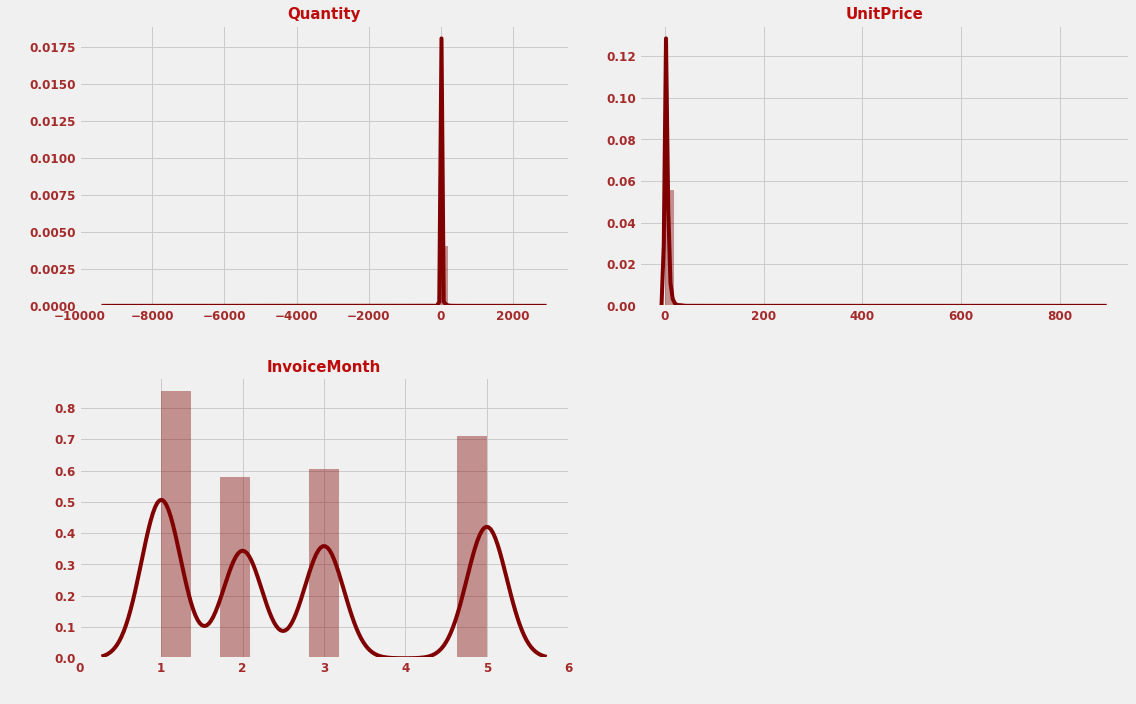

In [19]:
plt.figure(figsize = (16,10))

for i,col in enumerate(retail_data[numerical]):
  plt.subplot(2,2,i+1)
  sns.distplot(x = retail_data[col], color = 'maroon')
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()

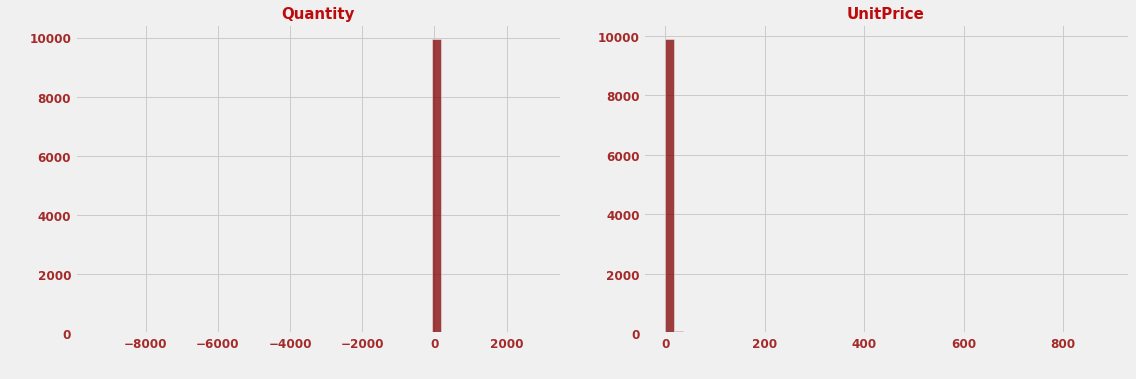

In [20]:
plt.figure(figsize = (16,10))

for i,col in enumerate(['Quantity', 'UnitPrice']):
  plt.subplot(2,2,i+1)
  sns.histplot(x = retail_data[col], color = 'maroon', bins = 50)
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()

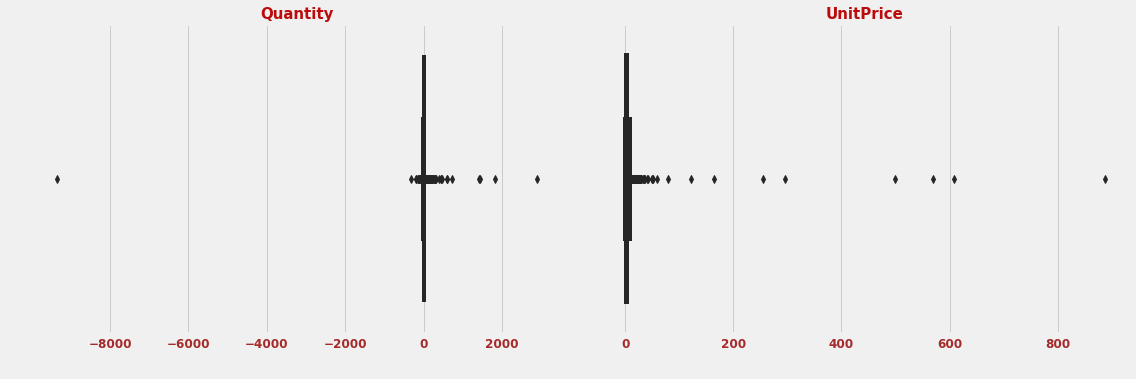

In [21]:
plt.figure(figsize = (16,10))

for i,col in enumerate(['Quantity', 'UnitPrice']):
  plt.subplot(2,2,i+1)
  sns.boxplot(x = retail_data[col], color = 'maroon')
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()

In [22]:
categorical

['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

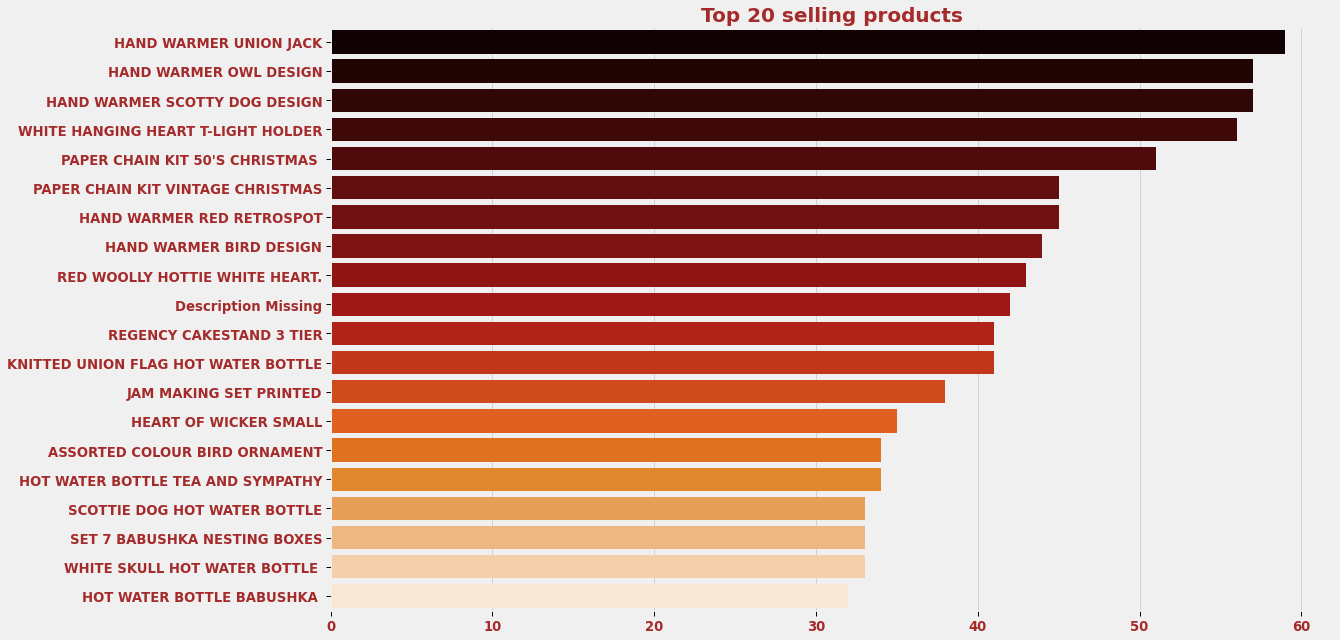

In [23]:
"""Categorical variables""" 
# Let's visualize some top products from the whole range
top_products = retail_data['Description'].value_counts()[:20]
plt.figure(figsize=(16,10))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='gist_heat')
plt.title("Top 20 selling products" ,fontsize = 20,  fontweight = 'bold', color = 'brown')
plt.xticks(fontweight = 'bold', color = 'brown')
plt.yticks(fontweight = 'bold', color = 'brown')
plt.show()

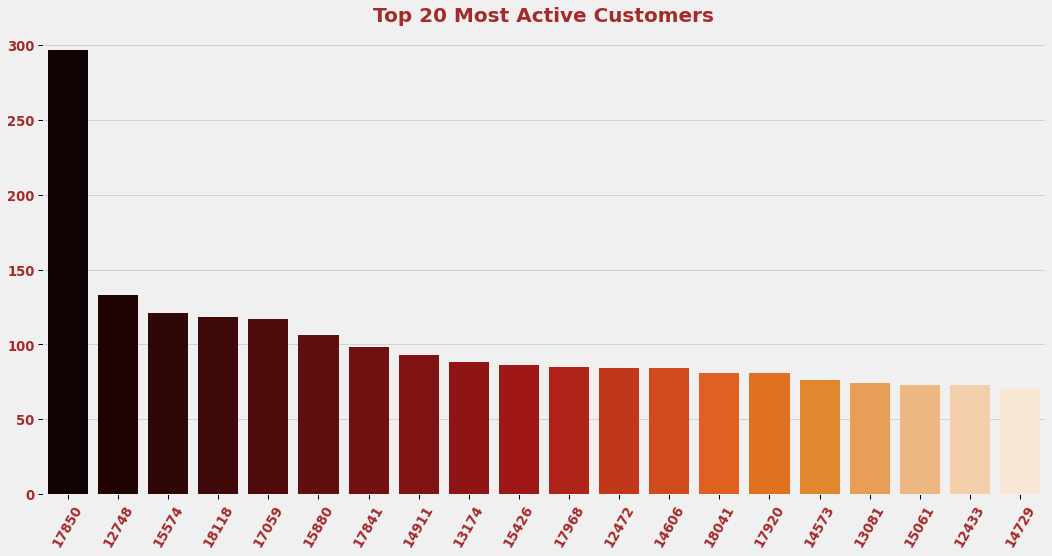

In [24]:
"""Categorical variables""" 
# Let's visualize some top products from the whole range
top_users = retail_data[retail_data['CustomerID'] != '-99']['CustomerID'].value_counts()[:20]
plt.figure(figsize=(16,8))
sns.set_context("paper", font_scale=1.5)
sns.barplot(x = top_users.index,
            y = top_users.values, 
           palette='gist_heat')
plt.title("Top 20 Most Active Customers" ,fontsize = 20,  fontweight = 'bold', color = 'brown')
plt.xticks(fontweight = 'bold', color = 'brown', rotation = 60)
plt.yticks(fontweight = 'bold', color = 'brown')
plt.show()

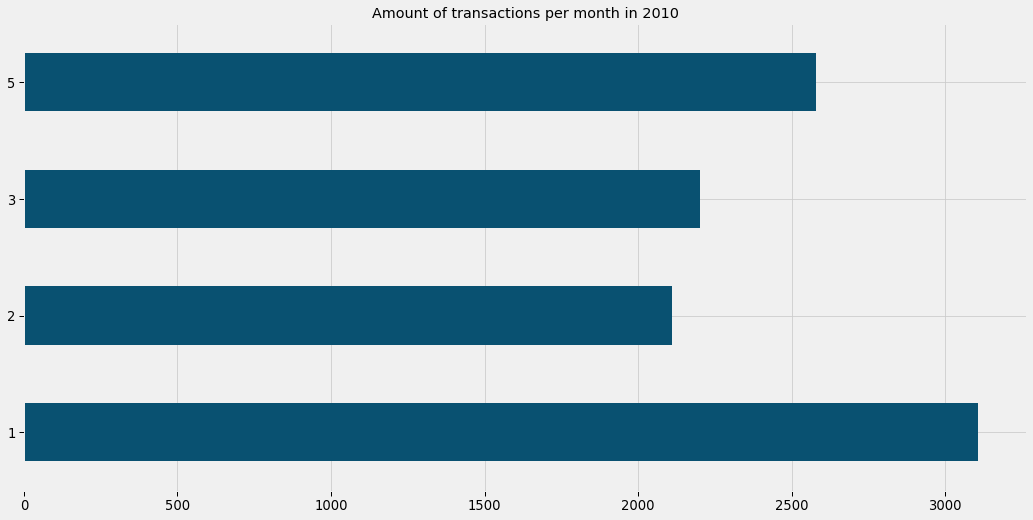

In [25]:
plt.figure(figsize=(16,8))
retail_data.InvoiceMonth.value_counts(sort=False).plot(kind='barh', color = '#095171')
plt.title("Amount of transactions per month in 2010")
plt.show()

In [26]:
#calculate revenue per row and add new column
retail_data['Revenue'] = retail_data['Quantity'] * retail_data['UnitPrice']

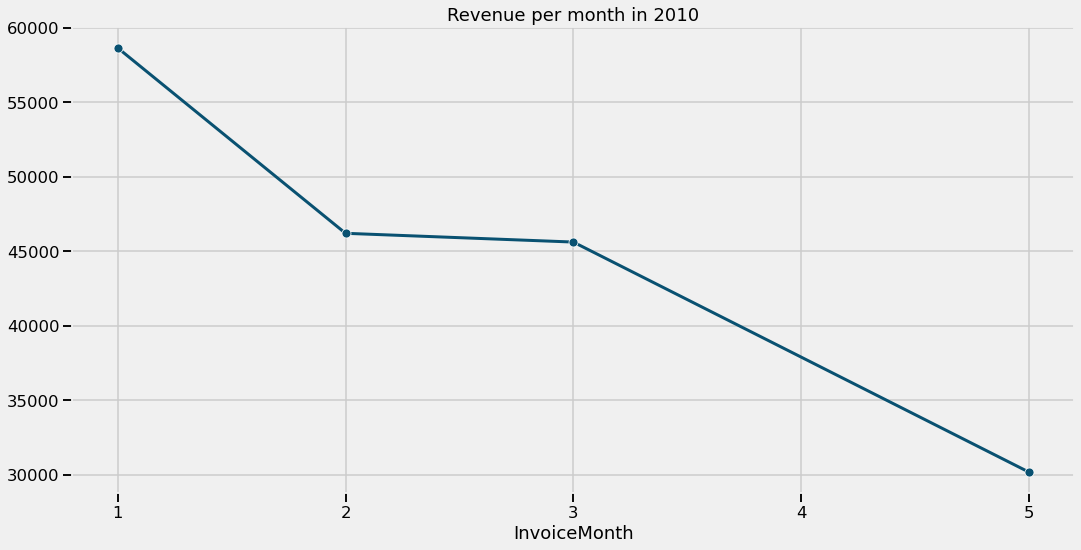

In [27]:
# Let's visualize the top grossing months
# retail_month = retail[retail.InvoiceDate.dt.year==2011]
monthly_gross = retail_data.groupby('InvoiceMonth').Revenue.sum()

plt.figure(figsize=(16,8))
sns.set_context("talk")
sns.set_palette("PuBuGn_d")
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o', color = '#095171', lw = 3)
plt.xticks(range(1,6))
plt.title("Revenue per month in 2010")
plt.show()

In [28]:
# New Attribute : Monetary

retail_data['Amount'] = retail_data['Quantity']*retail_data['UnitPrice']
rfm_m = retail_data.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,-99,36041.50
1,12395,346.10
2,12427,303.50
3,12431,358.25
4,12433,1919.14


In [29]:
# New Attribute : Frequency

rfm_f = retail_data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,-99,2291
1,12395,12
2,12427,10
3,12431,14
4,12433,73


In [30]:
# Merging the two retail_datas

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,-99,36041.50,2291
1,12395,346.10,12
2,12427,303.50,10
3,12431,358.25,14
4,12433,1919.14,73


In [31]:
# New Attribute : Recency

# Compute the maximum date to know the last transaction date
max_date = max(retail_data['InvoiceDate'])

# Compute the difference between max date and transaction date
retail_data['Diff'] = max_date - retail_data['InvoiceDate']

# Compute last transaction date to get the recency of customers
rfm_p = retail_data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()

# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days

# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,-99,36041.50,2291,0
1,12395,346.10,12,60
2,12427,303.50,10,61
3,12431,358.25,14,120
4,12433,1919.14,73,120


Text(0.5, 0, 'Attributes')

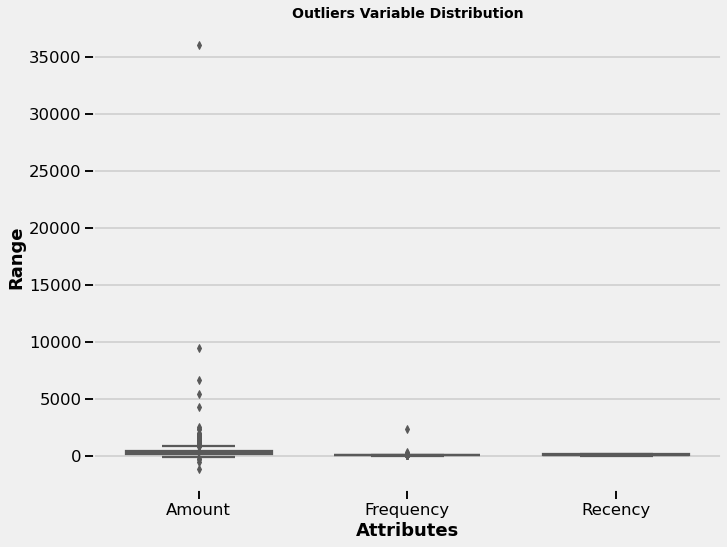

In [32]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [33]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

### **Rescaling the Attributes**
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [34]:
# Rescaling the attributes
from sklearn import preprocessing

rfm_retail_data = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = preprocessing.StandardScaler()

# fit_transform
rfm_retail_data_scaled = scaler.fit_transform(rfm_retail_data)
rfm_retail_data_scaled.shape


(319, 3)

### Step 5: Extracting Segments, Step 6 :Profiling Segments and  Step 7:  Describing Segments


In [73]:
retail_df = pd.read_csv('Downloads/OnlineRetaildata.csv')
# 3. Prepare the data for modelling

In [36]:
# new column: amount 
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [37]:
# monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12395.0,346.10
1,12427.0,303.50
2,12431.0,358.25
3,12433.0,1919.14
4,12471.0,-17.00


In [38]:
# new column: amount 
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [39]:
# monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12395.0,346.10
1,12427.0,303.50
2,12431.0,358.25
3,12433.0,1919.14
4,12471.0,-17.00


In [40]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12395.0,12
1,12427.0,10
2,12431.0,14
3,12433.0,73
4,12471.0,1


In [41]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12395.0,346.10,12
1,12427.0,303.50,10
2,12431.0,358.25,14
3,12433.0,1919.14,73
4,12471.0,-17.00,1


In [42]:
# recency
# convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d/%m/%Y %H:%M')

In [43]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
# compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2010-12-05 16:24:00')

In [45]:
# compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4 days 07:58:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4 days 07:58:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4 days 07:58:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4 days 07:58:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4 days 07:58:00


In [46]:
# recency
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12395.0,1 days 23:49:00
1,12427.0,2 days 05:40:00
2,12431.0,4 days 06:21:00
3,12433.0,4 days 03:00:00
4,12471.0,3 days 05:47:00


In [47]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12395.0,346.10,12,1 days 23:49:00
1,12427.0,303.50,10,2 days 05:40:00
2,12431.0,358.25,14,4 days 06:21:00
3,12433.0,1919.14,73,4 days 03:00:00
4,12471.0,-17.00,1,3 days 05:47:00


In [48]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12395.0,346.10,12,1
1,12427.0,303.50,10,2
2,12431.0,358.25,14,4
3,12433.0,1919.14,73,4
4,12471.0,-17.00,1,3


{'whiskers': [<matplotlib.lines.Line2D at 0x1a784aa2640>,
 'caps': [<matplotlib.lines.Line2D at 0x1a784a9ea30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a784aa24c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a784a9e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a784a641f0>],
 'means': []}

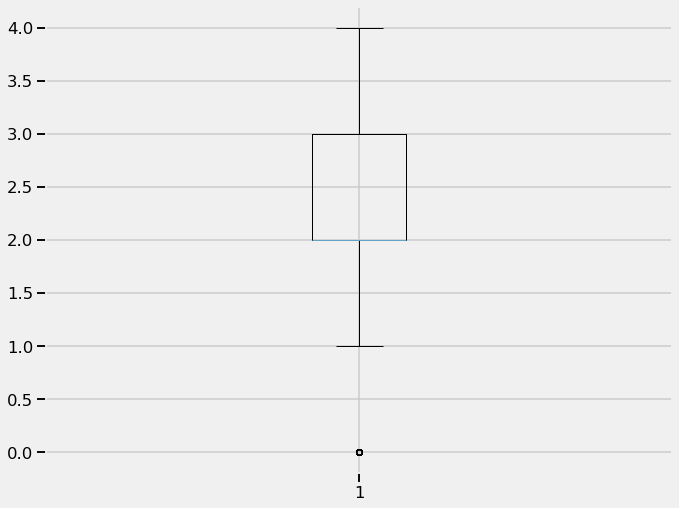

In [49]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

In [50]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


In [93]:
# 2. rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(319, 3)

In [94]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.063173,-0.451167,-0.845361
1,-0.163502,-0.534239,-0.153899
2,-0.034558,-0.368095,1.229024
3,3.641574,2.082529,1.229024
4,-0.918328,-0.908063,0.537563


### Step 8: Selecting the Target Segment(s) and Step 9:Evaluation and Monitoring

In [95]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=4)

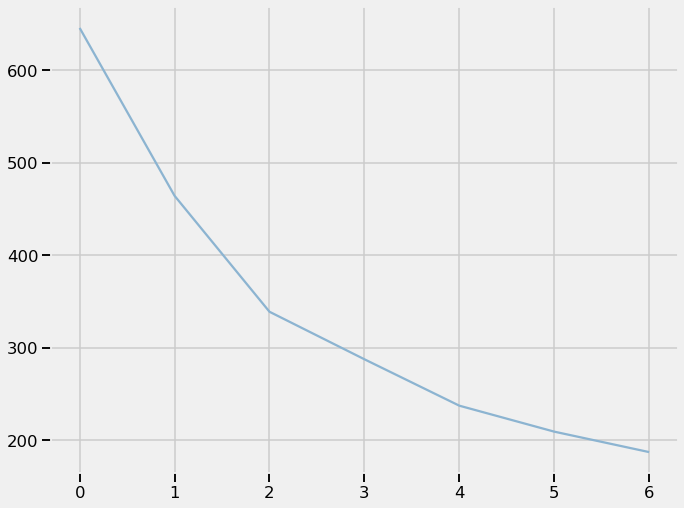

In [96]:
## Finding the Optimal Number of Clusters

### SSD

# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

In [97]:
### Silhouette Analysis
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
#rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
#selected_cols = ['amount', 'frequency', 'recency']
#cluster_data = retail_df.loc[:,selected_cols]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    #clustered_data = cluster_data.assign(Cluster=cluster_labels)
    #scatters(clustered_data, h='Cluster')
   
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4189898346983673
For n_clusters=3, the silhouette score is 0.4543131512814014
For n_clusters=4, the silhouette score is 0.46738869896044616
For n_clusters=5, the silhouette score is 0.4316958001879588
For n_clusters=6, the silhouette score is 0.36152226193631526
For n_clusters=7, the silhouette score is 0.36676297882255815
For n_clusters=8, the silhouette score is 0.3676724411037524


In [98]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [99]:
kmeans.labels_

array([2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [100]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()


,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12395.0,346.10,12,1,2,0
1,12427.0,303.50,10,2,0,0
2,12431.0,358.25,14,4,0,0
3,12433.0,1919.14,73,4,1,1
4,12471.0,-17.00,1,3,0,0


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

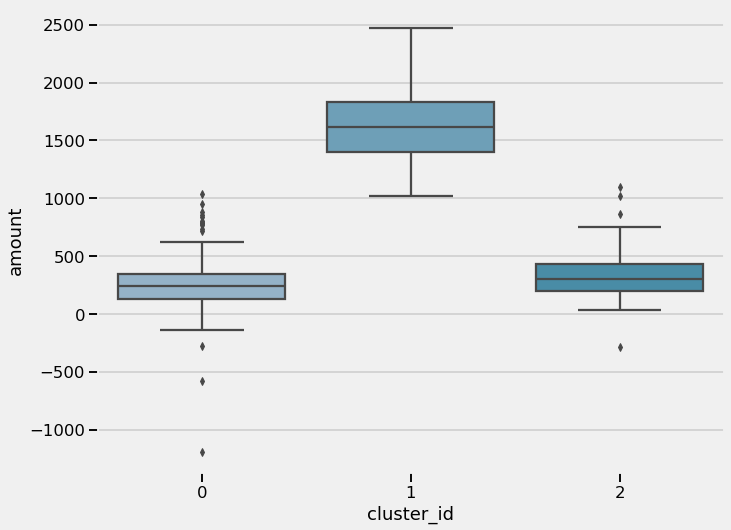

In [101]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

# Hierarchical Clustering

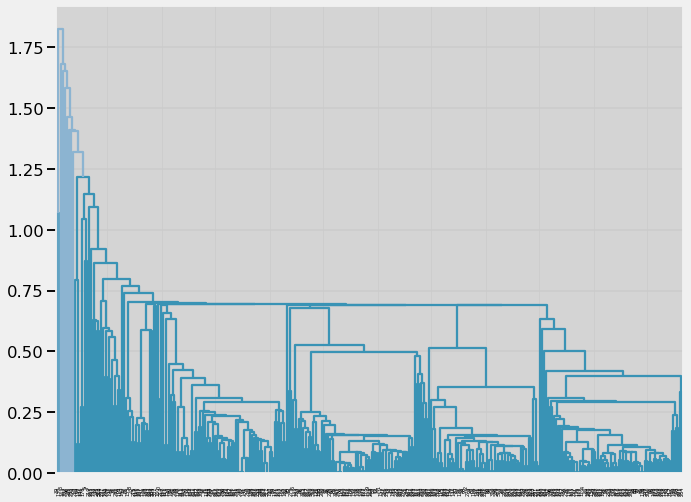

In [102]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

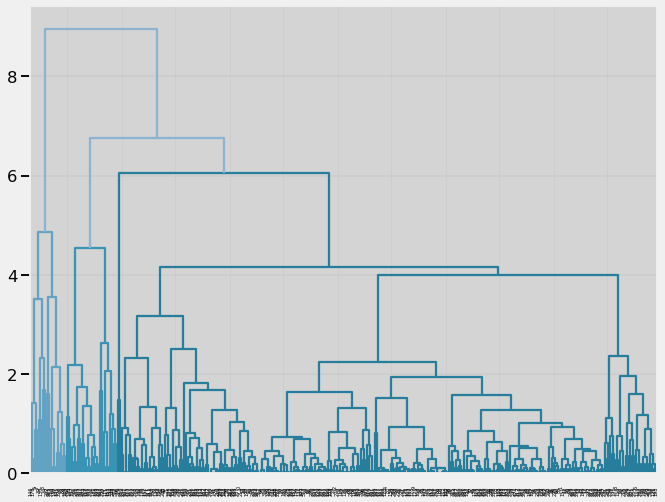

In [103]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [104]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,

In [105]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12395.0,346.10,12,1,2,0
1,12427.0,303.50,10,2,0,0
2,12431.0,358.25,14,4,0,0
3,12433.0,1919.14,73,4,1,1
4,12471.0,-17.00,1,3,0,0


             amount  frequency  recency
amount     1.000000   0.302721 -0.07164
frequency  0.302721   1.000000 -0.24797
recency   -0.071640  -0.247970  1.00000


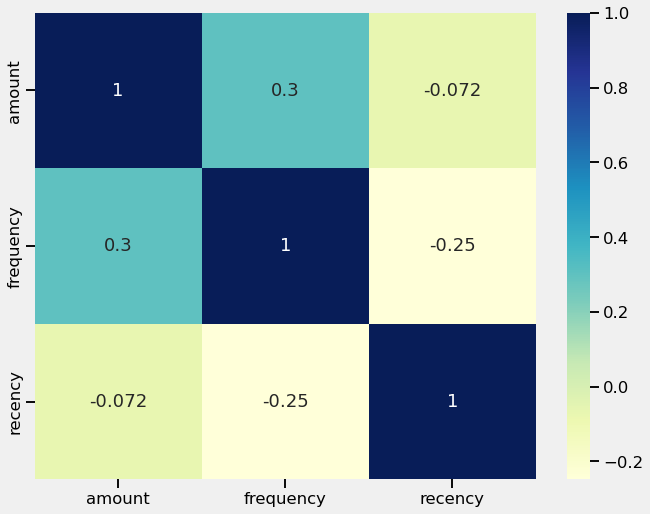

In [92]:
print(rfm_df_scaled.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(rfm_df_scaled.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()